# La théorie du bien-être social

Le problème présenté ici rentre dans le cadre de l'affectation de ressources à un certain nombre d'agents. On a un ensemble de ressources et un ensemble d'agents à qui l'on doit distribuer ces ressources. Chaque agent étant autonome, il n'accorde pas la même importance aux différentes ressources que ses congénères. Pour mesurer la satisfaction d'un agent lors de la possession d'un certain nombre de ressources on utilise ici une fonction d'utilité qui, pour chaque ressource, indique la valeur que l'agent lui accorde. D'autres considérations pourraient être prises en compte, nous restons dans un cadre simple. Quand les utilités sont additives, ce qui sera le cas ici, le bien-être individuel d'un agent est alors la somme des utilités qu'il accorde aux ressources qu'il possède.
Mais la collectivité doit aussi s'accorder sur une mesure de bien-être. Pour mesurer le bien-être social, il existe 4 grandes méthodes classiques:

- Utilitaire : maximiser la somme des utilités de chaque agent
- Egalitaire : maximiser le minimum
- Elitiste : maximiser le maximum
- ressource de Nash : maximiser le ressource

Le problème consiste alors à trouver comment affecter l'ensemble des ressources aux différents agents de manière à maximiser le bien-être social choisi.

Cette feuille montre comment, à l'aide d'une approche comportementale, il est possible de s'approcher voire de calculer l'optimum social.

### Comment coder ressources et fonctions d'utilité

Afin de pouvoir jouer sur les nombres de ressources et/ou d'agents, nous générerons aléatoirement des noms de ressources afin de pouvoir en avoir autant que l'on souhaite.  Pour la fonction d'utilité, on utilisera un dictionnaire Python, donc les clés sont les articles potentiels et les valeurs le poids que l'agent accorde à cette clé. Pour ces valeurs on prendra un entier naturel (donc sans le zero). Par convention, plus il sera important, plus l'agent accordera de la valeur à cet article.


In [1]:
import random
import string
import functools
import numpy as np

nb_resources =10                        # nb de ressources souhaités
valeurs = list(range(1,20))  # intervalle de valuation de chaque ressource

def genere_nom():
    return ''.join(random.choice(string.ascii_uppercase) for _ in range(5))
   
# Generer une liste de ressources
ressources = [genere_nom() for _ in range(nb_resources)]
print("Un ensemble de ressources \t", ressources)

# Creer une fonction d'utilité avec des valeurs aléatoires
u = {r : random.choice(valeurs) for r in ressources}
print("Une fonction d'utilité\t" , u)

Un ensemble de ressources 	 ['BRZTX', 'QNNLK', 'OTVEM', 'VFNIP', 'NORKN', 'CWVJL', 'TTOET', 'UKQWH', 'FVYDD', 'AJVLO']
Une fonction d'utilité	 {'BRZTX': 17, 'QNNLK': 12, 'OTVEM': 10, 'VFNIP': 5, 'NORKN': 5, 'CWVJL': 9, 'TTOET': 10, 'UKQWH': 7, 'FVYDD': 6, 'AJVLO': 12}


# On passe aux agents
Un agent est défini avec le `bag` de ressources qu'il possède et une fonction d'utilité `fUtil` lui permettant de l'évaluer.
Lors de sa création, la fonction d'évalution de l'agent est définie aléatoirement. Le bag est initialement vide. La méthode `welfare` permet de connaître le bien-être individuel de l'agent, ou en d'autres termes, comment l'agent évalue son bag.

In [2]:
class Agent:
    def __init__(self,name) :
        self.name=name
        self.fUtil = {r : random.choice(valeurs) for r in ressources}
        self.bag = []
    def __str__(self) :
        return "agent "+self.name+"  "+ str(len(self.bag)) + " ressources. welfare à "+ str(self.welfare())
    def welfare(self):
        return sum([self.fUtil.get(r) for r in self.bag]) 
        

Quelques manipulations basiques sur un agent pour s'entrainer ;-)

In [3]:
a=Agent("ag")
a.bag=random.sample(ressources,5) # choices : avec remplacement ; sample : sans remplacement

# le bag de l'agent a
print("Bag \t\t", a.bag)                              # ou sorted(a.bag)

# la fonction d'utilité de l'agent a
print("fUtil \t\t", a.fUtil)                        # ou dict(sorted(a.fUtil.items()))

# le bien-être de l'agent a
print("welfare \t", a.welfare())

# le bag avec ses valeurs
bv = [ (r,a.fUtil.get(r)) for r in a.bag]
print("bag valué \t" , bv )

# le bag valué , trié par ordre croissant des valeurs
print("bag valué trié \t", sorted(bv, key=lambda x: x[1]) )

# les ressources, triées par valuation (la premier est celle dont on se débarrasse le plus facilement
print("ressourc triées\t",  [r for r,_ in sorted(bv, key=lambda x: x[1])]    )

Bag 		 ['BRZTX', 'TTOET', 'CWVJL', 'OTVEM', 'AJVLO']
fUtil 		 {'BRZTX': 5, 'QNNLK': 7, 'OTVEM': 18, 'VFNIP': 18, 'NORKN': 15, 'CWVJL': 4, 'TTOET': 16, 'UKQWH': 7, 'FVYDD': 17, 'AJVLO': 10}
welfare 	 53
bag valué 	 [('BRZTX', 5), ('TTOET', 16), ('CWVJL', 4), ('OTVEM', 18), ('AJVLO', 10)]
bag valué trié 	 [('CWVJL', 4), ('BRZTX', 5), ('AJVLO', 10), ('TTOET', 16), ('OTVEM', 18)]
ressourc triées	 ['CWVJL', 'BRZTX', 'AJVLO', 'TTOET', 'OTVEM']


On peut maintenant créer autant d'agents que l'on souhaite, leur affecter des ressources et calculer leur bien-être individuel

In [4]:
# creer 5 agents
agentList = [Agent("ag"+str(i)) for i in range(5) ]
 
# distribuer les ressources aléatoirement
for i in range(len(ressources)) :
    random.choice(agentList).bag.append(ressources[i])

# afficher les agents
for a in agentList:
    print(a)

agent ag0  3 ressources. welfare à 37
agent ag1  2 ressources. welfare à 27
agent ag2  1 ressources. welfare à 7
agent ag3  3 ressources. welfare à 38
agent ag4  1 ressources. welfare à 12


# Approche centralisée
Maintenant que les agents ont un `bag` rempli, il est maintenant possible de calculer le bien-être de cette société d'agents.
Le calcul du bien-être social consiste à appliquer une opération spécifique (selon la fonction de bien-être souhaitée) à la valuation du bag de chaque agent. Pour le bien-être-social utilitaire c'est par exemple une somme.

In [5]:
 print('Utilitaire\t', functools.reduce(lambda a, b: sum([a,b]) , [a.welfare() for a in agentList]) )
 print('Egalitaire\t', functools.reduce(lambda a, b: min([a,b]) , [a.welfare() for a in agentList]) )
 print('Elitiste\t',   functools.reduce(lambda a, b: max([a,b]) , [a.welfare() for a in agentList]) )
 print('ressource Nash\t', functools.reduce(lambda a, b: np.prod([a,b]) , [a.welfare() for a in agentList]) )
 

Utilitaire	 121
Egalitaire	 7
Elitiste	 38
ressource Nash	 3188808


### Notion d'optimal social

Parmi toutes les affectations possibles de différentes ressources, certaines fournissent la valeur maximale possible à la fonction de bien-être social. Pour certains bien-être sociaux cette affectation est facile à calculer (elististe, utilitaire) , pour d'autres c'est beaucoup plus compliqué.

##### Solution optimale pour le bien-être social élitiste
Le bien-être social **élitiste** consiste à **maximiser la richesse du plus riche** des agents (élire son "champion"). Quand aucune utilité n'est négative, calculer cet optimal est facile puisqu'il suffit de donner tous les ressources à l'agents qui valorise le mieux la totalité des ressources.
On affecte tour à tour tous les produis à chaque agent, et on regarde qui est au bien-être maximum (on pourrait imaginer faire la somme des valuations de la fonction d'utilité sans affecter les ressources, mais cela ne fonctionnerait que si une ressource n'apparaît qu'une et une seule fois).

In [6]:
for a in agentList:
    a.bag = ressources.copy()

# On recherche la plus forte évaluation
index = np.argmax([a.welfare() for a in agentList])
m = agentList[index].welfare()

print("Elitiste. Valeur optimale : ", m,". Obtenue en donnant tout à l'agent ",a.name)

Elitiste. Valeur optimale :  121 . Obtenue en donnant tout à l'agent  ag4


##### Solution optimale pour le bien-être social utilitaire
Le bien-être social **utilitaire** consiste à **maximiser la somme** des richesses de tous les agents. Quand aucune utilité n'est négative, calculer et optimal est facile puisqu'il suffit de donner chaque ressource à l'agent qui la valorise le mieux.

In [7]:
# on réinitialise les bags
for a in agentList :
        a.bag=[]

# on affecte les ressources 1 par 1 à l'agent qui la valorise le mieux               
for r in ressources :
        index = np.argmax([a.fUtil.get(r)  for a in agentList])
        ag = agentList[index]
        ag.bag.append(r)

# On fait la somme des évaluation
s = sum([a.welfare() for a in agentList])

print("Utilitaire. Valeur optimale : ", s ," obtenue avec les affectations ")
for a in agentList :
        print(a, a.bag)   

Utilitaire. Valeur optimale :  149  obtenue avec les affectations 
agent ag0  2 ressources. welfare à 34 ['TTOET', 'FVYDD']
agent ag1  3 ressources. welfare à 43 ['QNNLK', 'VFNIP', 'CWVJL']
agent ag2  0 ressources. welfare à 0 []
agent ag3  2 ressources. welfare à 28 ['UKQWH', 'AJVLO']
agent ag4  3 ressources. welfare à 44 ['BRZTX', 'OTVEM', 'NORKN']


##### Solution optimale pour les bien-êtres égalitaires ou nash
Cette fois il n'y a pas de solution simple. Il faudrait tester toutes les allocations possibles. Avec `n` agents et `r` ressources il existe `n^r` affectations possibles (si on a 10 agents et 100 ressources cela fait 10^100 tests, ce qui est hors de portée des ordinateurs actuels).
On peut alors éventuellement utiliser des méthodes approximatives type Monte-Carlo ou Algorithme génétique, mais rien ne garantit l'optimalité du résultat.

Ci-dessous une méthode de monte-carlo pour le bien-être de Nash

In [8]:
bestWelfare=-1
bestAlloc=[]
for i in range(100000):
    # on réinitialise les bags
    for a in agentList :
        a.bag=[]
    # on affecte les ressources au hasard
    for r in ressources :
        a = random.choice(agentList)
        a.bag.append(r)
    # On compare le resultat à la meilleure situation connue
    p = np.prod([a.welfare() for a in agentList])  # sum,prod,min,max
    if (p > bestWelfare):
        bestWelfare=p
        bestAlloc = {a.name:a.bag for a in agentList}
        
print("Meilleure allocation",bestWelfare,bestAlloc)

Meilleure allocation 14267130 {'ag0': ['FVYDD', 'AJVLO'], 'ag1': ['BRZTX', 'TTOET'], 'ag2': ['QNNLK', 'NORKN'], 'ag3': ['CWVJL', 'UKQWH'], 'ag4': ['OTVEM', 'VFNIP']}


### Une approche multi-agents

L'approche centralisée présente un certain nombre de défauts :
- Avoir une affectation optimale par cette technique n'est pas toujours possible (voir ci-dessus). 
- Cette technique oblige tous les agents à indiquer à l'organe central de calcul toutes leurs utilités. La garantie d'une certaine privacité est pourtant parfois necessaire
- L'approche centralisée prend difficilement en compte le fait que les agents ne se connaissent pas forcément tous. Dans la vraie vie, les connaissances des individus dessinent un graphe social 


Nous proposons par la suite une approche comportementale qui permet aux agents d'échanger des ressources pour améliorer le bien-être social. Chaque agent tour à tour peut effectuer certains échanges avec ces accointances fidèles à un type de réseau social. On peut alors voir peu à peu le bien-être social évoluer.

##### Tout d'abord réalisons le SMA, le réseau social et l'agent ... 
- Cette fois, c'est le SMA qui crée les agents, dans son constructeur.
- Les agents sont initialement créés vides.
- Des méthodes permettent d'affecter aux agents des accointances ou des ressources. Ceci permettra pas la suite de relancer le même SMA soit avec la même affectation de ressources, soit avec le même réseau social, soit les deux.

##### Le réseau social

In [9]:
import networkx as nx

nb_nodes = 20
# graph = nx.barabasi_albert_graph(nb_nodes, 2)
#graph = nx.complete_graph(nb_nodes)
graph = nx.erdos_renyi_graph(nb_nodes,0.1)
#graph = nx.cycle_graph(nb_nodes)
#graph = nx.random_regular_graph(3,nb_nodes)
matrix = nx.to_numpy_array(graph, nodelist=range(nb_nodes))

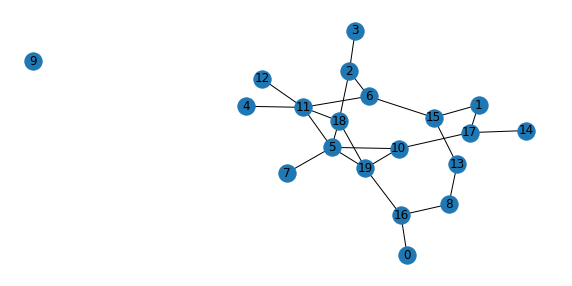

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))    # pour définir la taille de la figure
nx.draw_networkx(graph)
plt.axis('off')
plt.show()

#### L'agent et le SMA
Pour créer un SMA on lui passe simplement le nombre d'agent souhaité. C'est le SMA qui crée les agents. Les methodes setRessources et setAccointances permettent respectivement d'affecter les agents avec une affectation des ressources aux agents sous forme d'une liste de listes, et une matrice d'adjacence sous forme d'une liste de listes (obtenue facilement à partir d'un graphe networkx).
L'agent est initialement créé sans accointances ni ressources, mais il a déjà sa fonction d'utilité.
Attention : recréer un SMA recrée aussi les fonctions d'utilité de chacun !

In [94]:
class SMA:
    def __init__(self, nb_agents):
        self.agentList = [Agent(i) for i in range(nb_agents)]
        self.welfare_types=''    # 'Utilitarist' # 'Egalitarist','Utilitarist','Elitist',''Nash'
        

    def setRessources(self,init_affect) :
        if (len(init_affect) != len(self.agentList)) :
            print("Problem of size in setRessources :", len(init_affect), len(agentList))
            exit()
        for i in range(len(self.agentList)) :
            self.agentList[i].bag=init_affect[i]

    def setAccointances(self,adjacency_matrix) :
        if (len(adjacency_matrix[0]) != len(self.agentList)) :
            print("Problem of size in setAccointances :", len(adjacency_matrix[0]) , len(agentList))
            exit()
        for i in range(len(self.agentList)) :
            self.agentList[i].accointances = np.nonzero(adjacency_matrix[i])[0]

    def run(self, rounds):
        self.tick=0
        self.history=[]
        self.history.append(self.socialWelfare())
        for i in range(0,rounds):
            self.runOnce()
            self.history.append(self.socialWelfare())

    def runOnce(self):
        self.tick += 1
        for agent in self.agentList:
            agent.decide(self.tick)
        print("tick " + str(self.tick) + " ended")
        print("Le Welfare actuel est de ", self.socialWelfare())

    def socialWelfare(self):
        if self.welfare_type=='Egalitarist':
            return sum([a.welfare() for a in self.agentList])
        elif self.welfare_type=='Utilitarist':
            return min([a.welfare() for a in self.agentList])
        elif self.welfare_type=='Elitist':
            return max([a.welfare() for a in self.agentList])
        elif self.welfare_type=='Nash':
            return np.prod([a.welfare() for a in self.agentList])
        else :
            print("Unknown method in socialWelfare")
            exit()



# l'agent est le même que précédemment excepté qu'il a maintenant ses propres accointances, sa fonction d'Utilité
# et une méthode de décision avec différents échanges possibles
# par défaut il n'a ni ressources ni accointances (c'est le SMA qui lui donne)
class Agent:
    def __init__(self,name) :
        self.name=name
        self.fUtil = {r : random.choice(valeurs) for r in ressources}
        self.bag = []
        self.accointances = []
    def __str__(self) :
        return "agent "+self.name+"  "+ str(len(self.bag)) + " ressources. Welfare à "+ str(self.welfare())
    def welfare(self):
        return sum([self.fUtil.get(r) for r in self.bag])
    def getSortedBag(self):
        bagval = [ (r,self.fUtil.get(r)) for r in self.bag]
        return [r for r,_ in sorted(bagval, key=lambda x: x[1])]

    def gift(self):    
        # choisir une accointance au hasard
        friend = sma.agentList[np.random.choice(self.accointances)]
        # choisir une de ses propres ressources au hasard
        r = np.random.choice(self.bag)
        # donner cette ressource à l'accointance
        self.bag.remove(r)
        friend.bag.append(r)
        print(self.name, "donne la ressource ",r," à l'agent ",friend.name)

    # swap sans aucune contrainte
    def swap1(self):
        # choisir une accointance au hasard
        friend = sma.agentList[np.random.choice(self.accointances)]
        # choisir une de ses propres ressources au hasard
        r = np.random.choice(self.bag)
        # choisir une des ressources de l'autre au hasard
        if len(friend.bag)==0 :
            return
        s = np.random.choice(friend.bag)
        # echanger les ressources
        self.bag.remove(r)
        friend.bag.remove(s)
        friend.bag.append(r)
        self.bag.append(s)
        print(self.name, "echange ",r," contre ",s, " avec ",friend.name)
    
    # swap uniquement si socialwelfare augmente
    def swap2(self) :
        # OBLIGE A TOUT CONNAITRE, CE QUI N'EST PAS TRES "AGENT"
        # chercher s'il existe 2 ressources à échanger
        # on échange uniquement si le socialWelfare augmente
        # idealement il faudrait parcourir les miennes par intérêt décroissant (donc valeur croissante)
        # en utilisant getSortedBag()
        for r in self.bag :
            for friend in self.accointances :
                for s in  friend.bag :
                    # on teste si c'est mieux pour les deux
                    actualWelfare = sma.socialWelfare()
                    self.bag.remove(r)
                    friend.bag.remove(s)
                    friend.bag.append(r)
                    self.bag.append(s)
                    if sma.socialWelfare() > actualWelfare :
                        print(self.name, "echange ",r," contre ",s, " avec ",friend.name)
                        print("Welfare passe de ",actualWelfare," à ",sma.socialWelfare())
                        return
                    else :
                        # on remet tout en place
                        self.bag.remove(s)
                        friend.bag.remove(r)
                        friend.bag.append(s)
                        self.bag.append(r)
                       
 

    def decide(self,tick):
        # pour faire qq chose il faut au moins avoir des ressources et des amis
        if (len(self.accointances)==0 or len(self.bag)==0) :
            return
        behavior = 1 #random.randint(0,1)
        # s'écrit avec match-case à partir de python 3.10
        if   behavior==0 : self.gift()
        elif behavior==1 : self.swap1()
        elif behavior==2 : self.swap2()
        else : 
                print("Impossible behavior in decide")
                exit()

#### Une expérience



In [82]:
nb_agents=5
# une affectation aléatoire
l=[[] for i in range(nb_agents)]
for r in ressources :
    l[random.randrange(nb_agents)].append(r)

# un graphe aléatoire
graph = nx.erdos_renyi_graph(nb_agents,0.1)
m = nx.to_numpy_array(graph, nodelist=range(nb_agents))

# L'experience
sma = SMA(nb_agents)
sma.setAccointances(m)
sma.setRessources(l)

sma.welfare_type='Nash'
sma.run(10)

print("Final Social Welfare : ", sma.socialWelfare())
print("Best Social Welfare : ", max(sma.history))

0 echange  QPDQC  contre  RSLZG  avec  1
1 echange  DYOEC  contre  YRBWE  avec  0
tick 1 ended
Le Welfare actuel est de  324000
0 echange  DYOEC  contre  EUXRG  avec  1
1 echange  YRBWE  contre  EUXRG  avec  0
tick 2 ended
Le Welfare actuel est de  299880
0 echange  YRBWE  contre  DYOEC  avec  1
1 echange  YRBWE  contre  DYOEC  avec  0
tick 3 ended
Le Welfare actuel est de  299880
0 echange  YRBWE  contre  XJKQE  avec  1
1 echange  EUXRG  contre  RSLZG  avec  0
tick 4 ended
Le Welfare actuel est de  468000
0 echange  EUXRG  contre  QPDQC  avec  1
1 echange  EUXRG  contre  QPDQC  avec  0
tick 5 ended
Le Welfare actuel est de  468000
0 echange  XJKQE  contre  DYOEC  avec  1
1 echange  YRBWE  contre  DYOEC  avec  0
tick 6 ended
Le Welfare actuel est de  546840
0 echange  YRBWE  contre  DYOEC  avec  1
1 echange  QPDQC  contre  DYOEC  avec  0
tick 7 ended
Le Welfare actuel est de  583200
0 echange  EUXRG  contre  RSLZG  avec  1
1 echange  XJKQE  contre  QPDQC  avec  0
tick 8 ended
Le Welfar

#### Tracé de l'évolution du social welfare
Une fois l'expérience réalisée, il est alors possible de tracer l'évolution du social Welfare

[375840, 324000, 299880, 299880, 468000, 468000, 546840, 583200, 216000, 501120, 501120]


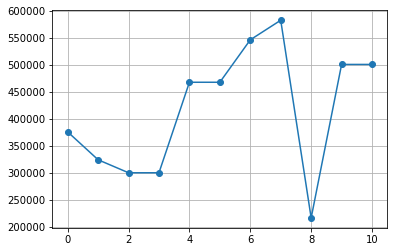

In [83]:
print(sma.history)
plt.plot(sma.history, "-o")
plt.grid()

#### N expériences
Comme le hasard intervient dans chaque expérience (distribution initiale des ressources, graphe s'il n'est pas complet), il est important de pouvoir répérer les mesures afin de moyenner les résultats. 

On montre ici comment calculer 100 expériences d'un graphe Erdos-Renyi avec un bien-être social Utilitaire pour 5 agents et 20 ressources. On change les affectations initiales de ressources mais pas le graphe, les maximums sont donc comparables.

In [97]:
nb_resources = 20
ressources = [genere_nom() for _ in range(nb_resources)]
valeurs = list(range(1,20))
nb_agents = 5 

# une nouvelle matrice d'adjacence
graph = nx.erdos_renyi_graph(nb_agents,0.1)
m = nx.to_numpy_array(graph, nodelist=range(nb_agents))

result=[]
sma = SMA(nb_agents)
sma.welfare_type='Nash'
for i in range(100):
    # Affectation initiale aléatoire
    l=[[] for i in range(nb_agents)]
    for r in ressources :
        l[random.randrange(nb_agents)].append(r)

    # une experience : SURTOUT NE PAS RECREER LE SMA
    sma.setAccointances(m)
    sma.setRessources(l)
    sma.run(100)
    result.append(max(sma.history))

# ATTENTION : 1mn de calcul
print(result)
print("Maximum obtenu : ", max(result), "En moyenne : ",np.mean(result))



0 echange  LBBPW  contre  JOCVX  avec  2
2 echange  TJGBM  contre  ATZFU  avec  0
3 echange  EKNFM  contre  MWUSJ  avec  4
4 echange  EKNFM  contre  ARXLR  avec  3
tick 1 ended
Le Welfare actuel est de  42863040
0 echange  JOCVX  contre  BXHQV  avec  2
2 echange  JOCVX  contre  BXHQV  avec  0
3 echange  GLHAO  contre  ALSBW  avec  4
4 echange  ARXLR  contre  MWUSJ  avec  3
tick 2 ended
Le Welfare actuel est de  63103920
0 echange  IBJLP  contre  YKYIQ  avec  2
2 echange  IBJLP  contre  JOCVX  avec  0
3 echange  ARXLR  contre  GLHAO  avec  4
4 echange  BDVFM  contre  VRWAY  avec  3
tick 3 ended
Le Welfare actuel est de  78510432
0 echange  TJGBM  contre  LBBPW  avec  2
2 echange  JOCVX  contre  LBBPW  avec  0
3 echange  BDVFM  contre  VRWAY  avec  4
4 echange  BDVFM  contre  EKNFM  avec  3
tick 4 ended
Le Welfare actuel est de  55689480
0 echange  JOCVX  contre  TJGBM  avec  2
2 echange  LBBPW  contre  TJGBM  avec  0
3 echange  ALSBW  contre  EKNFM  avec  4
4 echange  ARXLR  contre  BDV

On montre maintenant comment calculer 100 expériences d'un graphe Erdos-Renyi avec un bien-être social Egalitaire pour 5 agents et 20 ressources. A chaque experience on change le graphe mais pas les affectations initiales de ressources. Les maximums ne sont pas comparables entre eux.

In [ ]:
nb_resources = 20
ressources = [genere_nom() for _ in range(nb_resources)]
valeurs = list(range(1,20))
nb_agents = 5 

# Affectation initiale aléatoire
l=[[] for i in range(nb_agents)]
for r in ressources :
    l[random.randrange(nb_agents)].append(r)

result=[]
sma = SMA(nb_agents)
sma.welfare_type='Nash'
for i in range(100):
    # une nouvelle matrice d'adjacence
    graph = nx.erdos_renyi_graph(nb_agents,0.1)
    m = nx.to_numpy_array(graph, nodelist=range(nb_agents))
    # une experience : SURTOUT NE PAS RECREER LE SMA
    sma.setAccointances(m)
    sma.setRessources(l)
    sma.run(100)
    result.append(max(sma.history))

# ATTENTION : 1mn de calcul
print(result)
print("Maximum obtenu : ", max(result), "En moyenne : ",np.mean(result))

# Exercices
### Exercices faciles

Maintenant que les choses sont en place, il est possible de jouer sur de nombreux paramètres
1. le type de comportement utilisé (1). 
    - Actuellement l'agent précédent est un agent rationnel : il accepte un échange si son bien-être individuel augmente. 
      Que donnent les résultats si il devient social, c'est à dire qu'il n'accepte un échange que si le bien être social augmente ? 
      (Attention : Ceci necessite de trouver un critère entre les deux agents permettant d'être certain que le niveau de la société augmente 
      (trivial pour Egalitarist ou Elitist) )  
1. le type de comportement utilisé (2). 
    - Actuellement l'agent précédent teste un échange en priorité "ressources" (je choisis une ressource et j'essaye d'échanger 
      cette ressource avec tous les amis avant de changer de ressource). Que donne le contraire ?

### Exercices plus difficiles    
1. le bien-être social étudié
    - Précédemment, nous avons présenté 4 mesures de bien-être social. Que donne le Leximin ? Le leximin consiste à maximiser dans l'ordre lexicographique les vecteurs des utilités de chaque agent classées du min au max
1. le type de graphe
    - Est-ce que des phénomènes spécifiques se produisent selon la forme du graphe ou le taux de connectivité moyen ?
1. le type d'échange accepté
    - Actuellement il n'y a que des échanges de taille 0 ou 1. Qu'est-ce que cela change d'accepter des échanges de 2 ou 3 ressources en même temps ?
1. Les agents sont pour l'instant tous homogènes. Ils appliquent tous le même comportement. Qu'est-ce que ça donne si la population est hétérogène ?



# Bibliographie
- Moulin, H. (2004). Fair division and collective welfare. MIT press.
- Chevaleyre Y, Endriss U, Lang J, Maudet N (2005) Negotiating over small bundles of resources. In: AAMAS’05, pp 296–302
- Nongaillard, A., & Mathieu, P. (2014). Agent-based reallocation problem on social networks. Group Decision and Negotiation, 23(5), 1067-1083.
- Delahaye, J. P., & Mathieu, P. (2009). La répartition idéale des biens existe-t-elle?. Pour la science, 381, 88-93.
